In [1]:
import pandas as pd
import numpy as np
import pathlib
from matplotlib import pyplot as plt
import folium
import datetime as dt
import sys

In [2]:
#file_path = 'C:\Users\tachi\Documents\signate\'
diagram = pd.read_csv("diagram.csv",encoding = "shift-jis",index_col=0).T
tunnel = pd.read_csv("tunnel_location.csv",encoding = "shift-jis")
wind_location = pd.read_csv("wind_location.csv",encoding = "shift-jis")
stop_station = pd.read_csv("stop_station_location.csv",encoding = "shift-jis")
train = pd.read_csv("train.csv",encoding = "shift-jis")
snowfall_location = pd.read_csv("snowfall_location.csv",encoding = "shift-jis")
snowfall = pd.read_csv("snowfall.csv",encoding = "shift-jis")
kanazawa_nosnow = pd.read_csv("kanazawa_nosnow.csv",encoding = "shift-jis",header=None)
sample_sub = pd.read_csv("sample_submit.csv",encoding = "shift-jis")
out_of_service = pd.read_csv("out_of_service.csv",encoding = "shift-jis")
weather = pd.read_csv("weather.csv",encoding = "cp932")
test = pd.read_csv("test.csv",index_col=0,encoding = "shift-jis")

In [3]:
diagram.replace("↓","→",inplace=True)

In [4]:
start_location = [36.5780818,136.6478206]
middle_location = [36.7017294,137.2132271]
end_location = [37.0434525,137.8618923]
m = folium.Map(location=start_location,
           tiles='OpenStreetMap',
           zoom_start=10)
for index, row in tunnel.iterrows():
    #print(row)
    tunnel_start = [row.始点緯度,row.始点経度]
    tunnel_end = [row.終点緯度,row.終点経度]
    line = folium.vector_layers.PolyLine(
                locations=[tunnel_start,tunnel_end],                   
                color='black',                                  
                weight=10)
    # マーカーと線の地図レイヤへの追加
    m.add_child(line)
for index, row in wind_location.iterrows():
    location = [row.緯度,row.経度]
    marker = folium.Marker(
            location=location, 
            popup=row.風速計,
            icon=folium.Icon(color='green'))
    m.add_child(marker)
for index, row in stop_station.iterrows():
    location = [row.緯度,row.経度]
    marker = folium.Marker(
            location=location, 
            popup=row.停車場名,
            icon=folium.Icon(color='orange'))
    m.add_child(marker)
for index, row in snowfall_location.iterrows():
    location = [row.緯度,row.経度]
    marker = folium.Marker(
            location=location, 
            popup=row.積雪深計,
            icon=folium.Icon(color='blue'))
    m.add_child(marker)
marker = folium.Marker(
            location=start_location, 
            popup="金沢駅",
            icon=folium.Icon(color='red'))
m.add_child(marker)
marker = folium.Marker(
            location=middle_location, 
            popup="富山駅",
            icon=folium.Icon(color='red'))
m.add_child(marker)
marker = folium.Marker(
            location=end_location, 
            popup="糸魚川駅",
            icon=folium.Icon(color='red'))
m.add_child(marker)
m

In [5]:
m.save('map.html')

In [6]:
train

,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
15310,2016-12-31,554E,糸魚川,0.0,0.0,0.000000,0.000000
15311,2016-12-31,574E,糸魚川,0.0,0.0,0.000000,0.000000
15312,2016-12-31,576E,富山,0.0,0.0,0.000000,0.000000
15313,2016-12-31,558E,富山,0.0,0.0,0.000000,0.000000


In [7]:
test

,年月日,列車番号
0,2017-01-01,3500E
1,2017-01-01,552E
2,2017-01-01,3502E
3,2017-01-01,9536E
4,2017-01-01,554E
...,...,...
2425,2017-03-31,576E
2426,2017-03-31,3516E
2427,2017-03-31,578E
2428,2017-03-31,3518E


In [8]:
kanazawa_nosnow

,0
0,2290E
1,552E
2,3502E
3,9536E
4,554E
5,2292E
6,3506E
7,3508E
8,560E
9,564E


In [9]:
train_df = train[train["停車駅名"]=="富山"].drop(columns=["停車駅名"])
test["台車部分"] = 0
train_df = train_df.drop(["フェンダー部分(金沢方向)","フェンダー部分(東京方向)","合計"],axis=1)
train_df = pd.concat([train_df,test],axis=0)
train_df = pd.concat([train_df, train_df['年月日'].str.split('-', expand=True)], axis=1).rename(columns={0: '年', 1: '月',2: '日'})
train_df.drop(["年","日"],axis=1,inplace=True)
train_df

,年月日,列車番号,台車部分,月
0,2016-01-19,3500E,0.0,01
1,2016-01-19,562E,0.0,01
3,2016-01-19,560E,0.0,01
5,2016-01-19,558E,0.0,01
7,2016-01-19,556E,0.0,01
...,...,...,...,...
2425,2017-03-31,576E,0.0,03
2426,2017-03-31,3516E,0.0,03
2427,2017-03-31,578E,0.0,03
2428,2017-03-31,3518E,0.0,03


In [10]:
print(train_df.groupby(["月"]).mean())
print(train_df.groupby(["月"]).std())

            台車部分
月               
01  2.072710e-04
02  4.003557e-07
03  1.774662e-05
04  0.000000e+00
05  0.000000e+00
06  0.000000e+00
07  0.000000e+00
08  0.000000e+00
09  0.000000e+00
10  0.000000e+00
11  0.000000e+00
12  0.000000e+00
        台車部分
月           
01  0.001635
02  0.000016
03  0.000388
04  0.000000
05  0.000000
06  0.000000
07  0.000000
08  0.000000
09  0.000000
10  0.000000
11  0.000000
12  0.000000


In [11]:
train_df = train_df[train_df['月'].isin(['01', '02','03'])]
train_df

,年月日,列車番号,台車部分,月
0,2016-01-19,3500E,0.0,01
1,2016-01-19,562E,0.0,01
3,2016-01-19,560E,0.0,01
5,2016-01-19,558E,0.0,01
7,2016-01-19,556E,0.0,01
...,...,...,...,...
2425,2017-03-31,576E,0.0,03
2426,2017-03-31,3516E,0.0,03
2427,2017-03-31,578E,0.0,03
2428,2017-03-31,3518E,0.0,03


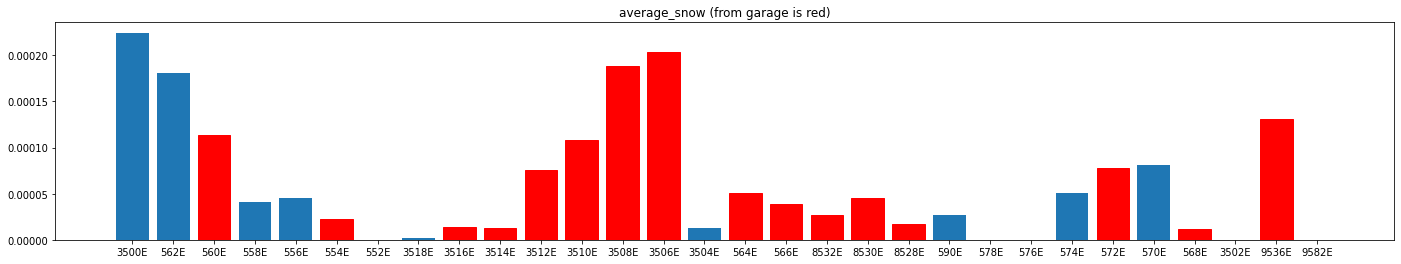

In [12]:
fig, ax = plt.subplots(figsize=(24, 4))
bar_list = ax.bar(train_df["列車番号"].unique().tolist(),train_df.groupby(["列車番号"]).mean().values.reshape(len(train_df["列車番号"].unique())))
ax.set_title("average_snow (from garage is red)")
for i,train_num in enumerate(train_df["列車番号"].unique().tolist()):
    if train_num in kanazawa_nosnow.values:
        bar_list[i].set_color("red")


<BarContainer object of 2 artists>

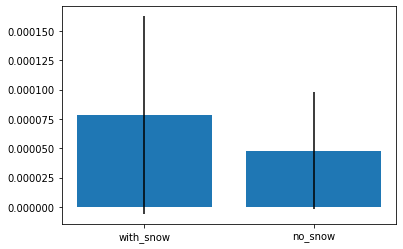

In [13]:
a=train_df.groupby(["列車番号"]).mean()
no_snow = a.reindex(index=kanazawa_nosnow.values.reshape(kanazawa_nosnow.shape[0]).tolist()).dropna()
with_snow = a.drop(index=no_snow.index)
plt.bar(np.array(["with_snow", "no_snow"]),np.array([with_snow.mean().台車部分, no_snow.mean().台車部分]),yerr=np.array([with_snow.std().台車部分, no_snow.std().台車部分]))

In [14]:
no_snow_through = no_snow.reindex(index=diagram[diagram["新高岡"]!="→"].index.tolist()).dropna()
no_snow_not_through = no_snow.drop(index=no_snow_through.index)
with_snow_through = with_snow.reindex(index=diagram[diagram["新高岡"]!="→"].index.tolist()).dropna()
with_snow_not_through = with_snow.drop(index=with_snow_through.index)

<BarContainer object of 4 artists>

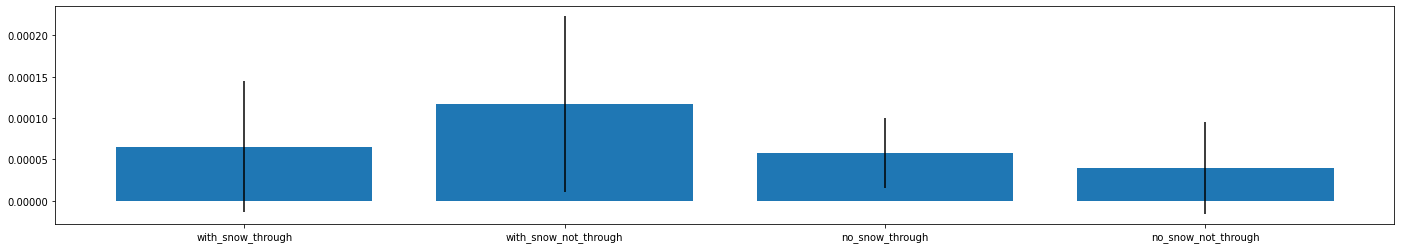

In [15]:
"""
print(no_snow_through)
print(no_snow_not_through)
print(with_snow_through)
print(with_snow_not_through)
"""
fig, ax = plt.subplots(figsize=(24, 4))
plt.bar(np.array(["with_snow_through", "with_snow_not_through","no_snow_through","no_snow_not_through"]),\
        np.array([with_snow_through.mean().台車部分, with_snow_not_through.mean().台車部分,no_snow_through.mean().台車部分, no_snow_not_through.mean().台車部分\
                 ]),yerr=np.array([with_snow_through.std().台車部分, with_snow_not_through.std().台車部分,no_snow_through.std().台車部分, no_snow_not_through.std().台車部分]))

In [16]:
train_df_dia = train_df.merge(diagram.reset_index().rename(columns={"index":"列車番号"}),on="列車番号")
train_df_dia.drop(columns=["黒部宇奈月温泉","糸魚川","上越妙高","飯山","長野","月"],inplace=True)
train_df_dia.to_csv("train_df_dia.csv",index=None)

In [17]:
train_df_dia_test = train_df_dia["年月日"].str.cat(train_df_dia["金沢"],sep=" ")
train_df_dia["金沢:時"]=pd.to_datetime(train_df_dia_test).dt.round("H")
train_df_dia_test = train_df_dia["年月日"].str.cat(train_df_dia["富山"],sep=" ")
train_df_dia["富山:時"]=pd.to_datetime(train_df_dia_test).dt.round("H")

In [18]:
weather["年月日時"]=pd.to_datetime(weather["年月日時"])
weather["天気"].describe

<bound method NDFrame.describe of 0         NaN
1         NaN
2        10.0
3         NaN
4         NaN
         ... 
17491     NaN
17492     4.0
17493     NaN
17494     NaN
17495     NaN
Name: 天気, Length: 17496, dtype: float64>

In [19]:
weather

,年月日時,地点,気温(℃),降水量(mm),降雪(cm),積雪(cm),日照時間(時間),風速(m/s),風向,日射量(MJ/㎡),現地気圧(hPa),海面気圧(hPa),相対湿度(％),蒸気圧(hPa),雲量(10分比),露点温度(℃),天気,視程(km)
0,2015-12-01 01:00:00,富山,9.4,2.0,0.0,0.0,0.0,1.4,西,0.0,1020.7,1022.8,86.0,10.1,NaN,7.2,NaN,NaN
1,2015-12-01 02:00:00,富山,9.0,0.5,0.0,0.0,0.0,1.7,南,0.0,1021.6,1023.7,88.0,10.1,NaN,7.1,NaN,NaN
2,2015-12-01 03:00:00,富山,9.1,0.0,0.0,0.0,0.0,0.6,西北西,0.0,1022.3,1024.4,89.0,10.3,10,7.4,10.0,10.0
3,2015-12-01 04:00:00,富山,8.8,0.5,0.0,0.0,0.0,1.7,北北西,0.0,1022.4,1024.5,88.0,10.0,NaN,6.9,NaN,NaN
4,2015-12-01 05:00:00,富山,8.5,0.0,0.0,0.0,0.0,1.7,南東,0.0,1022.5,1024.6,88.0,9.8,NaN,6.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,2017-03-31 20:00:00,金沢,7.4,0.0,0.0,0.0,0.0,4.0,東北東,NaN,1013.7,1017.9,63.0,6.5,NaN,0.8,NaN,NaN
17492,2017-03-31 21:00:00,金沢,7.5,0.0,0.0,0.0,0.0,5.0,東北東,NaN,1012.8,1016.9,63.0,6.5,10,0.9,4.0,15.0
17493,2017-03-31 22:00:00,金沢,7.4,0.0,0.0,0.0,0.0,5.4,東北東,NaN,1012.4,1016.5,63.0,6.5,NaN,0.8,NaN,NaN
17494,2017-03-31 23:00:00,金沢,7.4,0.0,0.0,0.0,0.0,5.1,東北東,NaN,1012.3,1016.4,62.0,6.4,NaN,0.6,NaN,NaN


In [20]:
weather["雲量(10分比)"].isnull().sum()

14823

In [21]:
train_df_dia

,年月日,列車番号,台車部分,金沢,新高岡,富山,金沢:時,富山:時
0,2016-01-19,3500E,0.0,6:00,→,6:19,2016-01-19 06:00:00,2016-01-19 06:00:00
1,2016-01-20,3500E,0.0,6:00,→,6:19,2016-01-20 06:00:00,2016-01-20 06:00:00
2,2016-01-21,3500E,0.0,6:00,→,6:19,2016-01-21 06:00:00,2016-01-21 06:00:00
3,2016-01-22,3500E,0.0,6:00,→,6:19,2016-01-22 06:00:00,2016-01-22 06:00:00
4,2016-01-23,3500E,0.0,6:00,→,6:19,2016-01-23 06:00:00,2016-01-23 06:00:00
...,...,...,...,...,...,...,...,...
4542,2017-03-27,9582E,0.0,14:23,14:37,14:47,2017-03-27 14:00:00,2017-03-27 15:00:00
4543,2017-03-28,9582E,0.0,14:23,14:37,14:47,2017-03-28 14:00:00,2017-03-28 15:00:00
4544,2017-03-29,9582E,0.0,14:23,14:37,14:47,2017-03-29 14:00:00,2017-03-29 15:00:00
4545,2017-03-30,9582E,0.0,14:23,14:37,14:47,2017-03-30 14:00:00,2017-03-30 15:00:00


In [22]:
kanazawa_weather = weather[weather["地点"]=="金沢"]
kanazawa_weather.columns = "金沢_" + weather.columns
toyama_weather = weather[weather["地点"]=="富山"]
toyama_weather.columns = "富山_" + weather.columns

In [23]:
kanazawa_weather

,金沢_年月日時,金沢_地点,金沢_気温(℃),金沢_降水量(mm),金沢_降雪(cm),金沢_積雪(cm),金沢_日照時間(時間),金沢_風速(m/s),金沢_風向,金沢_日射量(MJ/㎡),金沢_現地気圧(hPa),金沢_海面気圧(hPa),金沢_相対湿度(％),金沢_蒸気圧(hPa),金沢_雲量(10分比),金沢_露点温度(℃),金沢_天気,金沢_視程(km)
720,2015-12-01 01:00:00,金沢,9.6,1.5,0.0,0.0,0.0,1.0,東南東,NaN,1018.9,1023.0,93.0,11.1,NaN,8.5,NaN,NaN
721,2015-12-01 02:00:00,金沢,9.4,0.5,0.0,0.0,0.0,2.6,東,NaN,1019.5,1023.6,92.0,10.9,NaN,8.2,NaN,NaN
722,2015-12-01 03:00:00,金沢,9.3,0.5,0.0,0.0,0.0,2.2,東南東,NaN,1020.1,1024.2,88.0,10.3,10,7.4,10.0,8.0
723,2015-12-01 04:00:00,金沢,9.1,0.0,0.0,0.0,0.0,3.1,東,NaN,1020.1,1024.3,86.0,9.9,NaN,6.9,NaN,NaN
724,2015-12-01 05:00:00,金沢,8.8,0.0,0.0,0.0,0.0,3.5,東,NaN,1020.5,1024.7,87.0,9.9,NaN,6.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,2017-03-31 20:00:00,金沢,7.4,0.0,0.0,0.0,0.0,4.0,東北東,NaN,1013.7,1017.9,63.0,6.5,NaN,0.8,NaN,NaN
17492,2017-03-31 21:00:00,金沢,7.5,0.0,0.0,0.0,0.0,5.0,東北東,NaN,1012.8,1016.9,63.0,6.5,10,0.9,4.0,15.0
17493,2017-03-31 22:00:00,金沢,7.4,0.0,0.0,0.0,0.0,5.4,東北東,NaN,1012.4,1016.5,63.0,6.5,NaN,0.8,NaN,NaN
17494,2017-03-31 23:00:00,金沢,7.4,0.0,0.0,0.0,0.0,5.1,東北東,NaN,1012.3,1016.4,62.0,6.4,NaN,0.6,NaN,NaN


In [24]:
train_df = pd.merge(train_df_dia,kanazawa_weather,left_on="金沢:時",right_on="金沢_年月日時").drop(columns="金沢_年月日時")
train_df = pd.merge(train_df,toyama_weather,left_on="富山:時",right_on="富山_年月日時").drop(columns="富山_年月日時")
train_df

,年月日,列車番号,台車部分,金沢,新高岡,富山,金沢:時,富山:時,金沢_地点,金沢_気温(℃),...,富山_風向,富山_日射量(MJ/㎡),富山_現地気圧(hPa),富山_海面気圧(hPa),富山_相対湿度(％),富山_蒸気圧(hPa),富山_雲量(10分比),富山_露点温度(℃),富山_天気,富山_視程(km)
0,2016-01-19,3500E,0.0,6:00,→,6:19,2016-01-19 06:00:00,2016-01-19 06:00:00,金沢,1.7,...,南西,0.00,1001.9,1004.1,87.0,5.4,NaN,-1.7,NaN,NaN
1,2016-01-19,552E,0.0,6:13,6:27,6:37,2016-01-19 06:00:00,2016-01-19 07:00:00,金沢,1.7,...,南西,0.00,1002.5,1004.7,86.0,5.3,NaN,-1.9,NaN,NaN
2,2016-01-19,3502E,0.0,7:00,→,7:19,2016-01-19 07:00:00,2016-01-19 07:00:00,金沢,1.3,...,南西,0.00,1002.5,1004.7,86.0,5.3,NaN,-1.9,NaN,NaN
3,2016-01-20,3500E,0.0,6:00,→,6:19,2016-01-20 06:00:00,2016-01-20 06:00:00,金沢,5.5,...,西北西,0.00,1006.0,1008.2,80.0,5.8,NaN,-0.8,NaN,NaN
4,2016-01-20,552E,0.0,6:13,6:27,6:37,2016-01-20 06:00:00,2016-01-20 07:00:00,金沢,5.5,...,北西,0.00,1007.8,1010.0,82.0,5.9,NaN,-0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,2016-03-27,568E,0.0,14:50,15:04,15:13,2016-03-27 15:00:00,2016-03-27 15:00:00,金沢,11.6,...,北北東,2.37,1015.9,1018.0,37.0,5.4,1,-1.8,1.0,30.0
4543,2016-03-28,568E,0.0,14:50,15:04,15:13,2016-03-28 15:00:00,2016-03-28 15:00:00,金沢,12.9,...,北北東,2.34,1017.9,1020.0,49.0,7.1,1,2.0,1.0,30.0
4544,2016-03-29,568E,0.0,14:50,15:04,15:13,2016-03-29 15:00:00,2016-03-29 15:00:00,金沢,14.9,...,北北西,1.93,1019.8,1021.9,33.0,5.7,10-,-1.0,3.0,30.0
4545,2016-03-30,568E,0.0,14:50,15:04,15:13,2016-03-30 15:00:00,2016-03-30 15:00:00,金沢,17.1,...,西南西,1.43,1014.7,1016.7,35.0,7.5,8,2.8,2.0,10.0


In [25]:
print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|                       In|       264|
|                      Out|       640|
|                        a|      3503|
|                       ax|        48|
|                 bar_list|       288|
|                  diagram|     19015|
|                       dt|        72|
|             end_location|        72|
|                     exit|        48|
|                      fig|        48|
|                   folium|        72|
|              get_ipython|        64|
|                        i|        28|
|                    index|        28|
|          kanazawa_nosnow|      1499|
|         kanazawa_weather|   1987387|
|                     line|        48|
|                 location|        72|
|                        m|        48|
|                   marker|        48|
|          middle_location|        72|
|                  no_snow|      1825|
|      no_snow_not_through|       716|
|          no_snow_throug

In [26]:
train_df.to_csv("train_df_dia_weather.csv",index=None)

In [27]:
del with_snow,with_snow_not_through,with_snow_through,weather,tunnel_start,tunnel_end,train_df_dia_test,train_df_dia,train,\
kanazawa_weather,toyama_weather

In [28]:
print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|                       In|       344|
|                      Out|       640|
|                        a|      3503|
|                       ax|        48|
|                 bar_list|       288|
|                  diagram|     19015|
|                       dt|        72|
|             end_location|        72|
|                     exit|        48|
|                      fig|        48|
|                   folium|        72|
|              get_ipython|        64|
|                        i|        28|
|                    index|        28|
|          kanazawa_nosnow|      1499|
|                     line|        48|
|                 location|        72|
|                        m|        48|
|                   marker|        48|
|          middle_location|        72|
|                  no_snow|      1825|
|      no_snow_not_through|       716|
|          no_snow_through|       569|
|                       n

In [29]:
snowfall

,年月日時,積雪深(軌道),積雪深(側溝),積雪深(軌道A),積雪深(軌道B),地域名
0,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,富山野々上
1,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,小矢部
2,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,布施川
3,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,朝日
4,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,東金沢
...,...,...,...,...,...,...
349915,2017-03-31 23:50:00,-22.0,0.0,-22.0,-22.0,梶屋敷
349916,2017-03-31 23:50:00,-22.0,0.0,-22.0,-22.0,水橋白岩
349917,2017-03-31 23:50:00,-22.0,0.0,-22.0,-22.0,津幡
349918,2017-03-31 23:50:00,-22.0,0.0,-22.0,-22.0,田海川


In [30]:
snowfall_location.rename(columns={"積雪深計":"地域名"},inplace=True)
snowfall_location.drop(columns=["緯度","経度"],inplace=True)
snowfall_location

,地域名,キロ程
0,東金沢,2.419
1,津幡,13.369
2,小矢部,27.123
3,高岡赤祖父,40.657
4,富山野々上,51.521
5,水橋白岩,68.455
6,布施川,87.117
7,朝日,102.885
8,田海川,126.817
9,梶屋敷,136.815


In [31]:
snowfall = snowfall.merge(snowfall_location,on="地域名")
snowfall

,年月日時,積雪深(軌道),積雪深(側溝),積雪深(軌道A),積雪深(軌道B),地域名,キロ程
0,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,富山野々上,51.521
1,2015-12-01 00:10:00,555.0,0.0,999.0,999.0,富山野々上,51.521
2,2015-12-01 00:20:00,-22.0,0.0,-22.0,-22.0,富山野々上,51.521
3,2015-12-01 00:30:00,-23.0,0.0,-23.0,-23.0,富山野々上,51.521
4,2015-12-01 00:40:00,-23.0,0.0,-23.0,-23.0,富山野々上,51.521
...,...,...,...,...,...,...,...
349915,2017-03-31 23:10:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657
349916,2017-03-31 23:20:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657
349917,2017-03-31 23:30:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657
349918,2017-03-31 23:40:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657


In [32]:
snowfall=snowfall[snowfall["キロ程"]<=58.51]#富山駅がキロ程58.51
snowfall

,年月日時,積雪深(軌道),積雪深(側溝),積雪深(軌道A),積雪深(軌道B),地域名,キロ程
0,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,富山野々上,51.521
1,2015-12-01 00:10:00,555.0,0.0,999.0,999.0,富山野々上,51.521
2,2015-12-01 00:20:00,-22.0,0.0,-22.0,-22.0,富山野々上,51.521
3,2015-12-01 00:30:00,-23.0,0.0,-23.0,-23.0,富山野々上,51.521
4,2015-12-01 00:40:00,-23.0,0.0,-23.0,-23.0,富山野々上,51.521
...,...,...,...,...,...,...,...
349915,2017-03-31 23:10:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657
349916,2017-03-31 23:20:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657
349917,2017-03-31 23:30:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657
349918,2017-03-31 23:40:00,-22.0,0.0,-22.0,-22.0,高岡赤祖父,40.657


In [33]:
stop_station

,停車場名,キロ程,緯度,経度
0,金沢,0.000,36.577817,136.647963
1,新高岡,39.620,36.726969,137.011904
2,富山,58.510,36.701322,137.213608
3,黒部宇奈月温泉,92.290,36.874050,137.481133
4,糸魚川,131.543,37.043119,137.861307
5,上越妙高,168.540,37.081591,138.248252
6,飯山,198.100,36.845166,138.358924
7,長野,228.030,36.643146,138.188645


In [34]:
print(snowfall["積雪深(軌道)"].unique())
print(snowfall["積雪深(軌道A)"].unique())
print(snowfall["積雪深(軌道B)"].unique())


[ nan 555. -22. -23. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12.
 -11. -10.  -9.  -7.  -6.  -5.  -4.  -3.  -2.  -8.   0.   9.  16.  18.
  22.  31. 666. -24.  24.  -1.   1.   2.   3.   4.   5.]
[ nan 999. -22. -23. -24. -21. -20. -19. -18. -17. -16. -15. -14. -13.
 -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2. 555.   0.  10.
  12.  15.  18.  21.  31. 666. -30.  -1.   1.   2.   3.   4.   5. 444.]
[ nan 999. -22. -23. -24. -21. -20. -19. -18. -17. -16. -15. -14. -13.
 -12. -11. -10.  -9.  -8.  -6.  -5.  -4.  -3.  -2.  -7.   0.   3. 555.
  13.  20.  23.  32.  -1.   1.   2.   4.   5. 444.]


In [35]:
train_df

,年月日,列車番号,台車部分,金沢,新高岡,富山,金沢:時,富山:時,金沢_地点,金沢_気温(℃),...,富山_風向,富山_日射量(MJ/㎡),富山_現地気圧(hPa),富山_海面気圧(hPa),富山_相対湿度(％),富山_蒸気圧(hPa),富山_雲量(10分比),富山_露点温度(℃),富山_天気,富山_視程(km)
0,2016-01-19,3500E,0.0,6:00,→,6:19,2016-01-19 06:00:00,2016-01-19 06:00:00,金沢,1.7,...,南西,0.00,1001.9,1004.1,87.0,5.4,NaN,-1.7,NaN,NaN
1,2016-01-19,552E,0.0,6:13,6:27,6:37,2016-01-19 06:00:00,2016-01-19 07:00:00,金沢,1.7,...,南西,0.00,1002.5,1004.7,86.0,5.3,NaN,-1.9,NaN,NaN
2,2016-01-19,3502E,0.0,7:00,→,7:19,2016-01-19 07:00:00,2016-01-19 07:00:00,金沢,1.3,...,南西,0.00,1002.5,1004.7,86.0,5.3,NaN,-1.9,NaN,NaN
3,2016-01-20,3500E,0.0,6:00,→,6:19,2016-01-20 06:00:00,2016-01-20 06:00:00,金沢,5.5,...,西北西,0.00,1006.0,1008.2,80.0,5.8,NaN,-0.8,NaN,NaN
4,2016-01-20,552E,0.0,6:13,6:27,6:37,2016-01-20 06:00:00,2016-01-20 07:00:00,金沢,5.5,...,北西,0.00,1007.8,1010.0,82.0,5.9,NaN,-0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,2016-03-27,568E,0.0,14:50,15:04,15:13,2016-03-27 15:00:00,2016-03-27 15:00:00,金沢,11.6,...,北北東,2.37,1015.9,1018.0,37.0,5.4,1,-1.8,1.0,30.0
4543,2016-03-28,568E,0.0,14:50,15:04,15:13,2016-03-28 15:00:00,2016-03-28 15:00:00,金沢,12.9,...,北北東,2.34,1017.9,1020.0,49.0,7.1,1,2.0,1.0,30.0
4544,2016-03-29,568E,0.0,14:50,15:04,15:13,2016-03-29 15:00:00,2016-03-29 15:00:00,金沢,14.9,...,北北西,1.93,1019.8,1021.9,33.0,5.7,10-,-1.0,3.0,30.0
4545,2016-03-30,568E,0.0,14:50,15:04,15:13,2016-03-30 15:00:00,2016-03-30 15:00:00,金沢,17.1,...,西南西,1.43,1014.7,1016.7,35.0,7.5,8,2.8,2.0,10.0


In [50]:
"""
地域名	キロ程
0	東金沢	2.419
1	津幡	13.369
2	小矢部	27.123
3	高岡赤祖父	40.657
4	富山野々上	51.521
5	水橋白岩	68.455
6	布施川	87.117
7	朝日	102.885
8	田海川	126.817
9	梶屋敷	136.815
"""
train_df_test = train_df["年月日"].str.cat(train_df["金沢"],sep=" ")
train_df["金沢"]=pd.to_datetime(train_df_test)#.dt.round("H")
train_df_test = train_df["年月日"].str.cat(train_df["富山"],sep=" ")
train_df["富山"]=pd.to_datetime(train_df_test)#.dt.round("H")
train_df_through = train_df[train_df["新高岡"]=="→"]
train_df_shintakaoka = train_df[train_df["新高岡"]!="→"]

In [51]:
train_df_through

,年月日,列車番号,台車部分,金沢,新高岡,富山,金沢:時,富山:時,金沢_地点,金沢_気温(℃),...,富山_風向,富山_日射量(MJ/㎡),富山_現地気圧(hPa),富山_海面気圧(hPa),富山_相対湿度(％),富山_蒸気圧(hPa),富山_雲量(10分比),富山_露点温度(℃),富山_天気,富山_視程(km)
0,2016-01-19,3500E,0.0,2016-01-19 06:00:00,→,2016-01-19 06:19:00,2016-01-19 06:00:00,2016-01-19 06:00:00,金沢,1.7,...,南西,0.00,1001.9,1004.1,87.0,5.4,NaN,-1.7,NaN,NaN
2,2016-01-19,3502E,0.0,2016-01-19 07:00:00,→,2016-01-19 07:19:00,2016-01-19 07:00:00,2016-01-19 07:00:00,金沢,1.3,...,南西,0.00,1002.5,1004.7,86.0,5.3,NaN,-1.9,NaN,NaN
3,2016-01-20,3500E,0.0,2016-01-20 06:00:00,→,2016-01-20 06:19:00,2016-01-20 06:00:00,2016-01-20 06:00:00,金沢,5.5,...,西北西,0.00,1006.0,1008.2,80.0,5.8,NaN,-0.8,NaN,NaN
5,2016-01-20,3502E,0.0,2016-01-20 07:00:00,→,2016-01-20 07:19:00,2016-01-20 07:00:00,2016-01-20 07:00:00,金沢,4.8,...,北西,0.00,1007.8,1010.0,82.0,5.9,NaN,-0.5,NaN,NaN
6,2016-01-21,3500E,0.0,2016-01-21 06:00:00,→,2016-01-21 06:19:00,2016-01-21 06:00:00,2016-01-21 06:00:00,金沢,1.5,...,南南西,0.00,1020.8,1023.0,90.0,5.7,NaN,-0.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,2016-03-27,8528E,0.0,2016-03-27 13:46:00,→,2016-03-27 14:06:00,2016-03-27 14:00:00,2016-03-27 14:00:00,金沢,11.4,...,北,2.81,1016.4,1018.5,41.0,5.8,NaN,-0.6,NaN,NaN
4034,2016-03-28,8528E,0.0,2016-03-28 13:46:00,→,2016-03-28 14:06:00,2016-03-28 14:00:00,2016-03-28 14:00:00,金沢,12.7,...,北北東,2.83,1017.9,1020.0,51.0,7.7,NaN,3.3,NaN,NaN
4036,2016-03-29,8528E,0.0,2016-03-29 13:46:00,→,2016-03-29 14:06:00,2016-03-29 14:00:00,2016-03-29 14:00:00,金沢,14.5,...,北北東,2.16,1020.1,1022.2,33.0,6.0,NaN,-0.3,NaN,NaN
4038,2016-03-30,8528E,0.0,2016-03-30 13:46:00,→,2016-03-30 14:06:00,2016-03-30 14:00:00,2016-03-30 14:00:00,金沢,17.6,...,西南西,2.22,1014.8,1016.8,29.0,6.7,NaN,1.3,NaN,NaN


In [53]:
for index,row in snowfall_location.iterrows():
    print(row["地域名"])
    print(type(row["地域名"]))
    split=row["キロ程"]/58.51
    print(split)
    train_df_through[row["地域名"]] = (1-split)*train_df_through["金沢"]+split*train_df_through["富山"]
    train_df_through

東金沢
<class 'str'>
0.04134336010938301


TypeError: cannot perform __rmul__ with this index type: DatetimeArray

In [54]:
train_df_through["金沢"]+train_df_through["富山"]

TypeError: cannot add DatetimeArray and DatetimeArray

In [67]:
0.5*train_df_through["金沢"]

TypeError: cannot perform __rmul__ with this index type: DatetimeArray

In [66]:
type(dt.datetime.now())

datetime.datetime